# SciPy Optimize Global

## Global Optimization

* basinhopping
* brute 
* differential_evolution
* shgo
* dual_annealing

In [60]:
# Importing the packages for the example
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [95]:
f = lambda x :  1/50*x[0]**2 - np.cos(x[0])

f_parameter = lambda x, a :  1/50*x[0]**2 - np.cos(x[0]-a)

g = lambda x : 1/25*(x[0]**2 + x[1]**2) - np.cos(x[0])*np.cos(x[1])

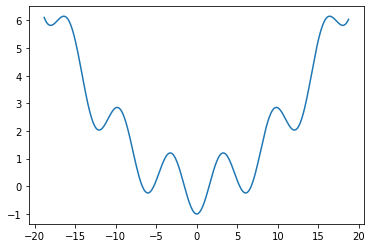

In [4]:
x0 = np.arange(-6*np.pi,6*np.pi,.1)

plt.plot(x0,f([x0]))

No handles with labels found to put in legend.


Text(0, 0.5, 'x[1]')

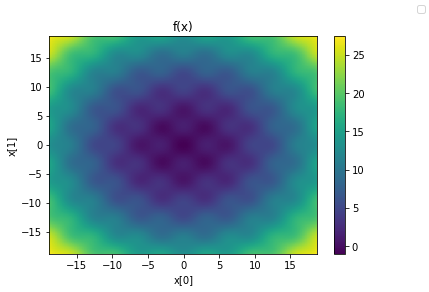

In [37]:
x0_a, x1_a = np.meshgrid(x0,x0)

# plotting our test functions
fig, ax = plt.subplots()
pos = ax.pcolormesh(x0_a,x1_a,g([x0_a,x1_a]) )

# labeling and measuring necessities
fig.legend()
fig.colorbar(pos,ax=ax)
ax.set_title('f(x)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

## Brute

In [8]:
optimize.brute(f,ranges=((-6*np.pi,6*np.pi), ))

array([-8.8817842e-16])

In [83]:
optimize.brute(f,ranges=(slice(-6*np.pi,6*np.pi,.5),) )

array([-2.22044605e-16])

In [97]:
optimize.brute(f_parameter,ranges=((-6*np.pi,6*np.pi), ) , args=(2,))

array([1.92303061])

#### Full Output

The boolean flag `full_output` returns the values computed during the brute computation.  Instead of a single value, the output becomes a tuple containing

| Position | Content | 
| --- | --- | 
| 0 | Minimum position | 
| 1 | Function value at minimum position | 
| 2 | Points function computed at |
| 3 | Function value at computed points |

In [78]:
ans_brute_full_output=optimize.brute(f,ranges=((-6*np.pi,6*np.pi), ),full_output=True)
ans_brute_full_output[3].shape

(20,)

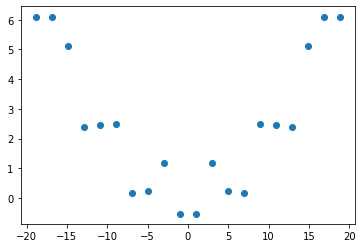

In [79]:
plt.scatter(ans_brute_full_output[2],ans_brute_full_output[3])

Let's see what the output looks like for a multidimensional function:

In [80]:
g_full_output=optimize.brute(g,ranges=(slice(-6*np.pi,6*np.pi,.5),slice(-6*np.pi,6*np.pi,.5) ),full_output=True)

The array of points where the routine computes functions is now a 3D array:

In [81]:
g_full_output[2].shape

(2, 76, 76)

The first index scans over the indenpendent variable.  For example, `g_full_output[2][0,:,:]` controls `x[0]`, while `g_full_output[2][1,:,:]` controls `x[1]`.  

#### Finishing Polish 

Brute by itself will only return the lowest point on the fixed grid, but for the sake of computationally efficiency, the grid can be fairly coarse.

In [91]:
optimize.brute(f,ranges=(slice(-6*np.pi,6*np.pi,.5),),finish=optimize.minimize )

array([-8.58956511e-09])

workers ?   don't really understand that part

## shgo

In [31]:
bounds=[(-6*np.pi,6*np.pi)]

In [32]:
optimize.shgo(f,bounds)

     fun: -1.0
    funl: array([-1.])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 2
   nlfev: 3
   nlhev: 0
   nljev: 1
 success: True
       x: array([0.])
      xl: array([[0.]])

In [44]:

optimize.shgo(g,bounds,args=(0.5,) )

     fun: -0.9951923133916076
    funl: array([-0.99519231])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
   nlfev: 12
   nlhev: 0
   nljev: 4
 success: True
       x: array([0.48076808])
      xl: array([[0.48076808]])

In [52]:
? optimize.basinhopping

Signature:
 optimize.basinhopping(
    func,
    x0,
    niter=100,
    T=1.0,
    stepsize=0.5,
    minimizer_kwargs=None,
    take_step=None,
    accept_test=None,
    callback=None,
    interval=50,
    disp=False,
    niter_success=None,
    seed=None,
)
Docstring:
Find the global minimum of a function using the basin-hopping algorithm

Basin-hopping is a two-phase method that combines a global stepping
algorithm with local minimization at each step.  Designed to mimic
the natural process of energy minimization of clusters of atoms, it works
well for similar problems with "funnel-like, but rugged" energy landscapes
[5]_.

As the step-taking, step acceptance, and minimization methods are all
customizable, this function can also be used to implement other two-phase
methods.

Parameters
----------
func : callable ``f(x, *args)``
    Function to be optimized.  ``args`` can be passed as an optional item
    in the dict ``minimizer_kwargs``
x0 : array_like
    Initial guess.
niter : inte

In [21]:
? optimize.shgo

Signature:
 optimize.shgo(
    func,
    bounds,
    args=(),
    constraints=None,
    n=100,
    iters=1,
    callback=None,
    minimizer_kwargs=None,
    options=None,
    sampling_method='simplicial',
)
Docstring:
Finds the global minimum of a function using SHG optimization.

SHGO stands for "simplicial homology global optimization".

Parameters
----------
func : callable
    The objective function to be minimized.  Must be in the form
    ``f(x, *args)``, where ``x`` is the argument in the form of a 1-D array
    and ``args`` is a tuple of any additional fixed parameters needed to
    completely specify the function.
bounds : sequence
    Bounds for variables.  ``(min, max)`` pairs for each element in ``x``,
    defining the lower and upper bounds for the optimizing argument of
    `func`. It is required to have ``len(bounds) == len(x)``.
    ``len(bounds)`` is used to determine the number of parameters in ``x``.
    Use ``None`` for one of min or max when there is no bound in t